# Pandas: A Hitchhiker's Pocket Guide

*Pandas stands for Python Data Analysis Library


In [1]:
# Importing the package as pd isn't required but it is a typical convention -- who has time to write 'pandas'
import pandas as pd

Now before we dive into all of the exploratory analysis and wrangling that can be done with the library, I want to stress the importance of selecting how you operate with file types. Below are a few of the "usual suspects" you may encounter;

<BR>

* CSVs- are the most common types of data files that you might work with. They do a brilliant job for most things, but, for nuanced work, industry level datasets or for data that requires extra care they are a messy solution or quick fix. Once you start getting into more complex projects, or if you have to do manual encoding / treatment of variables you may lose out on some of the information you attempted to make sense of with a CSV format. There are also many performance advantages to using other file types -- but that topic is for a different post.

* Pickles- If the above sounds like you, use pickles. Unique to Python specifically -- this option is a brilliant way to "save state" or save the project / variable exactly as you left it and pick up later precisely where you left off. 

<BR>


Alternatively, Pandas offers support for a wide variety of data files, below is the exhaustive list (as of Version 1.2.4); 

* JSONs- (originally JavaScript objects) can be treated or though of as a list of dataframes. For more info on that check out this post here [INSERT LINK].
* Excel- your typical workbook or .xlsx files -- you can read individual sheets or skip rows (from top if a heading is in sheet)
* Feather- a dataframe storage system built for R & Python, supposedly high read and writing performance
* fwf- or 'Fixed-Width-Formatted' lines files
* Clipboard- yes the clipboard clipboard, looks for whitespace as the delimiter
* gbq- Google BigQuery files for the projects orders of magnitude thicker than CSVs
* hdf- Hierarchical Data Format, basically makes sense of the data without any outside input -- used by HDFStore as an HDF5 
* html- tables from the webpage language
* orc- Optimized Row Columnar, supposedly stores data in an optimized way when compared to other file formats -- in the Apache Hadoop ecosystem
* parquet- similar to orc, is a CSV alternative in the Apache Hadoop ecosystem (organizes data by column and index as opposed to storing each row together)
* sas- read SAS files, Windows based statistical software
* spss- read SAS files, statistcal & text based analysis'
* sql- read either a query or database into a pd object -- input the query where file name/path goes
* sql_query- returns result of SQL query as a df
* sql_table- returns an SQL table -- a static version of what might be in one or several queries
* stata- reads Stata files, a statistical software with files having the .dta extension
* table- reads a general delimited file into a dataframe (wherein data is separated by a specific number of spaces)

In [16]:
# Reading Files
df = pd.read_csv('~/Desktop/Programming/Toy Datasets/coffee_ratings.csv', na_values='whoopitydoo')

# Writing Files
#df.to_csv('coffee_ratings_CLEAN.csv') #specify new filename to save in current dir or can give a new filepath
# lets say you did some exploratory analysis and cleaned up the data (prepped for ML task) you could export or save state by using the above to write a CSV after you have made desired changes to the df!


# Display Hidden Columns + Option Setting
pd.set_option('display.max_columns', None) #views all columns & can horizontal scroll through!

* You can specify what NA values are = pd.read_csv("filepath", na_values='insert_your_NA_value_here')
* More options can be found in the documentation here- https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html so customize to your heart's content
(and you can set these to default in source files)

## Exploratory Analysis

- Glimpse dataset
- Summary / Distributions Info
- Pivot Tables
- Correlations

In [129]:
# Glance at the n-rows on top or bottom of df (head/tail respectively)
df.head(5)
df.tail(5)

Unnamed: 0  total_cup_points  species          owner country_of_origin  \
1334        1335             78.75  Robusta    luis robles           Ecuador   
1335        1336             78.08  Robusta    luis robles           Ecuador   
1336        1337             77.17  Robusta    james moore     United States   
1337        1338             75.08  Robusta  cafe politico             India   
1338        1339             73.75  Robusta  cafe politico           Vietnam   

                      company                         region  \
1334                robustasa               san juan, playas   
1335                robustasa               san juan, playas   
1336  global opportunity fund  kwanza norte province, angola   
1337            cafe politico                            NaN   
1338            cafe politico                            NaN   

                           producer  aroma  sweetness  moisture       color  
1334  Café Robusta del Ecuador S.A.   7.75       7.75      0.00  Blue-Green  
1335  Café Robusta del Ecuador S.A.   7.50       8.42      0.00  Blue-Green  
1336                   Cafe Cazengo   7.33       7.42      0.00         NaN  
1337                            NaN   7.42       7.08      0.10       Green  
1338                            NaN   6.75       6.67      0.12        None

In [130]:
# Get Dimensions of DataFrame
df.shape #returns a tuple that displays -- (rows, columns) or (instances, features) for the shape of the dataframe

(1339, 12)

In [131]:
df.index #returns the index range and length of steps between each index

RangeIndex(start=0, stop=1339, step=1)

In [63]:
df.columns #returns column names as index

Index(['Unnamed: 0', 'total_cup_points', 'species', 'owner',
       'country_of_origin', 'company', 'region', 'producer', 'aroma',
       'sweetness', 'moisture', 'color'],
      dtype='object')

In [6]:
# High Level Summary of DataFrame
df.info() #Includes: range of instances/rows, column names, number of non-NAs, dtypes / counts of unique dtypes and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1339 non-null   int64  
 1   total_cup_points   1339 non-null   float64
 2   species            1339 non-null   object 
 3   owner              1332 non-null   object 
 4   country_of_origin  1338 non-null   object 
 5   company            1130 non-null   object 
 6   region             1280 non-null   object 
 7   producer           1107 non-null   object 
 8   aroma              1339 non-null   float64
 9   sweetness          1339 non-null   float64
 10  moisture           1339 non-null   float64
 11  color              1121 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 125.7+ KB


In [127]:
df.dtypes #Returns just the data type per column -- can easily convert these (see below)

Unnamed: 0             int64
total_cup_points     float64
species               object
owner                 object
country_of_origin     object
company               object
region                object
producer              object
aroma                float64
sweetness            float64
moisture             float64
color                 object
dtype: object

In [7]:
# Descriptive Statistics for Numeric Data
df.describe() #returns count, mean, standard deviation, min / max and quartiles for numerical data -- excluding NAs!

Unnamed: 0  total_cup_points        aroma    sweetness     moisture
count  1339.000000       1339.000000  1339.000000  1339.000000  1339.000000
mean    670.000000         82.089851     7.566706     9.856692     0.088379
std     386.680316          3.500575     0.377560     0.616102     0.048287
min       1.000000          0.000000     0.000000     0.000000     0.000000
25%     335.500000         81.080000     7.420000    10.000000     0.090000
50%     670.000000         82.500000     7.580000    10.000000     0.110000
75%    1004.500000         83.670000     7.750000    10.000000     0.120000
max    1339.000000         90.580000     8.750000    10.000000     0.280000

In [39]:
# Individual Statistics (per column)
df.sum() #returns sum of all rows in each column 
#df.cumsum() #needs to be all numeric -- can use a numeric only df (see below)

df.min() #absolute min
df.max() #absolute max

df.median() #median per numeric column
df.mean() #mean/average per numeric column

Unnamed: 0          670.000000
total_cup_points     82.089851
aroma                 7.566706
sweetness             9.856692
moisture              0.088379
dtype: float64

In [77]:
# Display Unique Values per Column
for col in df[['country_of_origin', 'aroma', 'color', 'species']]: #can just use df here to get uniques for each column in df
    print(f"{col}-> {df[col].unique()} \n")
#this output can get lengthy so we might want to subset (like above) to look at the columns of interest! (typically better for categorical data)

country_of_origin-> ['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' nan 'India'] 

aroma-> [8.67 8.75 8.42 8.17 8.25 8.58 8.08 8.33 8.   8.5  7.83 7.92 7.67 7.75
 7.58 7.5  7.42 7.81 7.33 7.25 7.17 7.08 5.08 7.   6.92 6.83 6.75 6.67
 6.42 6.17 6.5  6.33 0.  ] 

color-> ['Green' nan 'Bluish-Green' 'None' 'Blue-Green'] 

species-> ['Arabica' 'Robusta'] 



In [9]:
# Unique Values & Counts of them per Column
df['species'].value_counts()

Arabica    1311
Robusta      28
Name: species, dtype: int64

In [31]:
df.count() #counts for all columns in df (Non-NA values)

ID              1339
total_points    1339
species         1339
owner           1332
country         1338
company         1130
region          1280
producer        1107
aroma           1339
sweetness       1339
moisture        1339
color           1121
dtype: int64

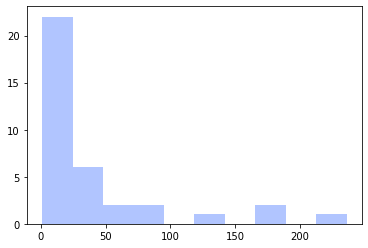

In [33]:
# Plot a Histogram with value_counts()
df['country_of_origin'].value_counts().hist(color='#B1C5FF', grid=False)

## Sort, GroupBy & Pivot Tables

In [17]:
# Sorting Values
df.sort_values(by="total_cup_points", axis=0, ascending=False) #False = Descending Order!

Unnamed: 0  total_cup_points  species                       owner  \
0              1             90.58  Arabica                   metad plc   
1              2             89.92  Arabica                   metad plc   
2              3             89.75  Arabica    grounds for health admin   
3              4             89.00  Arabica         yidnekachew dabessa   
4              5             88.83  Arabica                   metad plc   
...          ...               ...      ...                         ...   
1306        1307             68.33  Arabica    juan carlos garcia lopez   
1307        1308             67.92  Arabica     myriam kaplan-pasternak   
1308        1309             63.08  Arabica  exportadora atlantic, s.a.   
1309        1310             59.83  Arabica   juan luis alvarado romero   
1310        1311              0.00  Arabica             bismarck castro   

     country_of_origin                                company  \
0             Ethiopia      metad agricultural developmet plc   
1             Ethiopia      metad agricultural developmet plc   
2            Guatemala                                    NaN   
3             Ethiopia  yidnekachew debessa coffee plantation   
4             Ethiopia      metad agricultural developmet plc   
...                ...                                    ...   
1306            Mexico                              terra mia   
1307             Haiti                           haiti coffee   
1308         Nicaragua               exportadora atlantic s.a   
1309         Guatemala                                unicafe   
1310          Honduras                      cigrah s.a de c.v   

                               region                               producer  \
0                        guji-hambela                              METAD PLC   
1                        guji-hambela                              METAD PLC   
2                                 NaN                                    NaN   
3                              oromia  Yidnekachew Dabessa Coffee Plantation   
4                        guji-hambela                              METAD PLC   
...                               ...                                    ...   
1306               juchique de ferrer               JUAN CARLOS GARCÍA LOPEZ   
1307  department d'artibonite , haiti          COEB Koperativ Ekselsyo Basen   
1308                           jalapa                        Teófilo Narváez   
1309                    nuevo oriente      WILLIAM ESTUARDO MARTINEZ PACHECO   
1310                        comayagua                        Reinerio Zepeda   

      aroma  sweetness  moisture       color  
0      8.67      10.00      0.12       Green  
1      8.75      10.00      0.12       Green  
2      8.42      10.00      0.00         NaN  
3      8.17      10.00      0.11       Green  
4      8.25      10.00      0.12       Green  
...     ...        ...       ...         ...  
1306   7.08      10.00      0.11        None  
1307   6.75       6.00      0.14  Blue-Green  
1308   7.25       6.00      0.13       Green  
1309   7.50       1.33      0.10       Green  
1310   0.00       0.00      0.12       Green  

[1339 rows x 12 columns]

Blue-Green           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Bluish-Green    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Green                    AxesSubplot(0.1,0.15;0.363636x0.340909)
None                AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

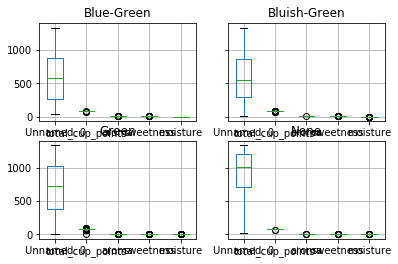

In [27]:
# Group-By
g = df.groupby('color') #select what you what to group by (functions a bit like a new index)

# Run one of the below to see the group based on a function
g.sum() #sum of entries
g.mean() #mean of each col given the color
g.boxplot() #displays a boxplot per col
# g.plot() #lineplot for each col per group - output can get a bit verbose

The above barely scratches the surface of what you can do with groupby, an exhaustive list is provided in the Pandas documentation here- https://pandas.pydata.org/docs/reference/groupby.html


Pivot Table Arguments:

Values = What you want to examine in Pivot Table

Index = What categories you want to examine Values by

aggfunc = How you want to examine values, what function?

In [34]:
# Pivot Table
import numpy as np #for mean function

df.pivot_table(values=['aroma', 'sweetness'], index=['species', 'country_of_origin'], aggfunc=[np.mean])

mean          
                                         aroma sweetness
species country_of_origin                               
Arabica Brazil                        2.021051  2.296890
        Burundi                       2.002483  2.302585
        China                         2.032741  2.293916
        Colombia                      2.034400  2.297000
        Costa Rica                    2.036656  2.291925
        Cote d?Ivoire                 2.004179  2.302585
        Ecuador                       2.014903  2.302585
        El Salvador                   2.037328  2.282771
        Ethiopia                      2.065435  2.288217
        Guatemala                     2.019997  2.282860
        Haiti                         1.966526  2.193661
        Honduras                          -inf      -inf
        India                         2.037317  1.897620
        Indonesia                     2.033676  2.299118
        Japan                         2.047693  2.302585
        Kenya                         2.051791  2.299811
        Laos                          2.015225  2.302585
        Malawi                        2.023701  2.302585
        Mauritius                     1.981001  2.302585
        Mexico                        2.008550  2.299485
        Myanmar                       1.987591  2.302585
        Nicaragua                     1.991130  2.280271
        Panama                        2.036016  2.302585
        Papua New Guinea              2.119863  2.302585
        Peru                          2.039182  2.288715
        Philippines                   1.994901  2.288715
        Rwanda                        2.057963  2.233235
        Taiwan                        2.018679  2.298833
        Tanzania, United Republic Of  2.023853  2.302585
        Thailand                      2.012184  2.298251
        Uganda                        2.066858  2.302585
        United States                 2.064297  2.302585
        United States (Hawaii)        2.023797  2.263276
        United States (Puerto Rico)   2.034194  2.285248
        Vietnam                       2.011276  2.302585
        Zambia                        2.037317  2.302585
Robusta Ecuador                       2.031298  2.089151
        India                         2.040974  2.039617
        Uganda                        2.057661  2.042139
        United States                 2.030683  2.014846
        Vietnam                       1.909543  1.897620

Correlations

Plotting these correlation matricies can be more effective than looking at the values (particularly if you have a ton of features in your dataset) so plotting out your correlation matrix can make visually identifying relationships far easier. 

In [10]:
# Basic Corr
df.corr(method='pearson') #returns table of correlations (correlation matrix of columns)

Unnamed: 0  total_cup_points     aroma  sweetness  moisture
Unnamed: 0          1.000000         -0.678978 -0.591209  -0.295284  0.146185
total_cup_points   -0.678978          1.000000  0.791627   0.554029 -0.117722
aroma              -0.591209          0.791627  1.000000   0.253493 -0.134127
sweetness          -0.295284          0.554029  0.253493   1.000000  0.072699
moisture            0.146185         -0.117722 -0.134127   0.072699  1.000000

Correlation Matrix Methods- below are the supported ways of calculating the correlations

- pearson: default (the most popular method of calculating a correlation coefficient -- involves the averages of both columns & subtracting differences and dividing by the square root of the product of the two sums of squares)
- kendall: measures the "ordinal" (categorical) association between your two columns (used typically with T-Tests)
- spearman: effectively a method you use when the assumptions involved in a pearson correlation are blatantly violated (homoscedastic variance, normally distributed variables, no outliers, etc.) and further, it does not capture the direction of the relationship, spearman correlation will just tell you if the two variables "move" or are correlated with each other
- callable: this can be your own specified correlation calculation / function, the requirements are two one-dimensional arrays must be inputs and the function done on those arrays must produce a single floating-point number

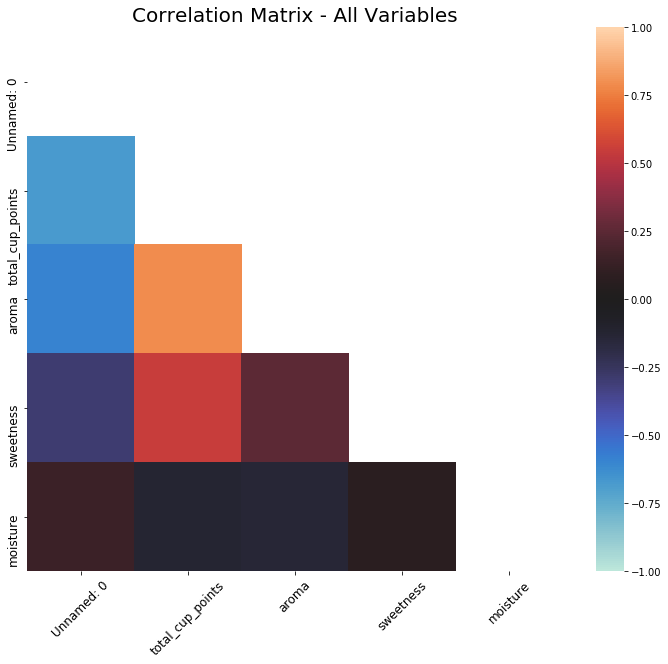

In [9]:
# Plot Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Makes a nice looking Plot
plt.figure(figsize=(12, 10))
plt.tick_params(labelsize=12, rotation=45);
matrix = np.triu(df.corr())
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = False, mask = matrix, vmin=-1, vmax=1, center= 0)
plt.title("Correlation Matrix - All Variables", fontsize=20)
plt.show()


## NAs
- Aggregate df info
- Finding particular instances
- Visualizing (if you're into that)

In [5]:
# Sum of NAs per column
df.isna().sum() #more generally isna() returns a boolean value if an instance is missing, NaN, etc.

Unnamed: 0             0
total_cup_points       0
species                0
owner                  7
country_of_origin      1
company              209
region                59
producer             232
aroma                  0
sweetness              0
moisture               0
color                218
dtype: int64

<BarContainer object of 12 artists>

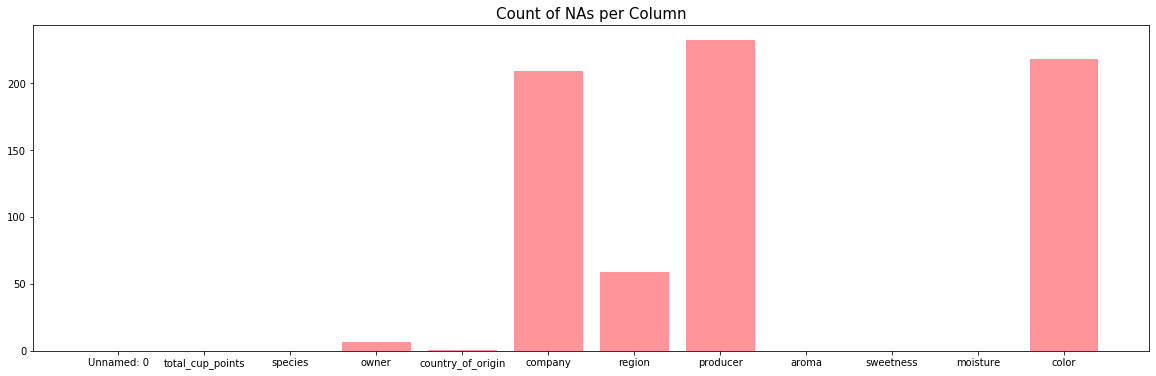

In [46]:
# Alternatively you could plot a bar graph of NA counts per column with the following
import matplotlib.pyplot as plt

sum_nas = df.isna().sum()
plt.figure(figsize=(20, 6)) #to adjust figure size (x-axis gets crowded)
plt.title('Count of NAs per Column', fontsize=15)
plt.bar(sum_nas.index, sum_nas, color="#FF949A")

In [58]:
# Examine Rows in Data where NA
df[df.isna().any(axis=1)] #any column value in given row is NA

Unnamed: 0  total_cup_points  species                        owner  \
2              3             89.75  Arabica     grounds for health admin   
5              6             88.83  Arabica                    ji-ae ahn   
6              7             88.75  Arabica                hugo valdivia   
7              8             88.67  Arabica  ethiopia commodity exchange   
8              9             88.42  Arabica  ethiopia commodity exchange   
...          ...               ...      ...                          ...   
1302        1303             70.67  Arabica       volcafe ltda. - brasil   
1312        1313             83.50  Robusta               nishant gurjer   
1336        1337             77.17  Robusta                  james moore   
1337        1338             75.08  Robusta                cafe politico   
1338        1339             73.75  Robusta                cafe politico   

     country_of_origin                                company  \
2            Guatemala                                    NaN   
5               Brazil                                    NaN   
6                 Peru  richmond investment-coffee department   
7             Ethiopia                                    NaN   
8             Ethiopia                                    NaN   
...                ...                                    ...   
1302            Brazil                          volcafe ltda.   
1312             India                           kaapi royale   
1336     United States                global opportunity fund   
1337             India                          cafe politico   
1338           Vietnam                          cafe politico   

                             region  \
2                               NaN   
5                               NaN   
6                               NaN   
7                            oromia   
8                           oromiya   
...                             ...   
1302                        cerrado   
1312    chikmagalur karnataka indua   
1336  kwanza norte province, angola   
1337                            NaN   
1338                            NaN   

                                       producer  aroma  sweetness  moisture  \
2                                           NaN   8.42      10.00      0.00   
5                                           NaN   8.58      10.00      0.11   
6                                           HVC   8.42      10.00      0.11   
7     Bazen Agricultural & Industrial Dev't Plc   8.25       9.33      0.03   
8     Bazen Agricultural & Industrial Dev't Plc   8.67       9.33      0.03   
...                                         ...    ...        ...       ...   
1302                                        NaN   7.00      10.00      0.11   
1312                Nishant Gurjer Kaapi Royale   8.00       8.00      0.00   
1336                               Cafe Cazengo   7.33       7.42      0.00   
1337                                        NaN   7.42       7.08      0.10   
1338                                        NaN   6.75       6.67      0.12   

             color  
2              NaN  
5     Bluish-Green  
6     Bluish-Green  
7              NaN  
8              NaN  
...            ...  
1302         Green  
1312           NaN  
1336           NaN  
1337         Green  
1338          None  

[481 rows x 12 columns]

In [59]:
df[df['country_of_origin'].isna()] #examining one column, not whole df
#Chose this row because it is the only NA for 'country_of_origin' in Sum of NAs per col (above)

Unnamed: 0  total_cup_points  species               owner  \
1197        1198             79.08  Arabica  racafe & cia s.c.a   

     country_of_origin company region producer  aroma  sweetness  moisture  \
1197               NaN     NaN    NaN      NaN   6.75       10.0       0.1   

     color  
1197   NaN

## Cleaning & PreProcessing Data

- ReNaming Columns
- Dropping NAs
- Converting dtypes
- Factorize
- ReEncode Columns
- Pipe Function
- Eval Function

In [4]:
# Re-Naming Columns
df.rename(columns={'Unnamed: 0' : 'ID', }, inplace=True) #one specific column

new_names = {'total_cup_points' : 'total_points',
'country_of_origin' : 'country' }
df = df.rename(columns=new_names) #multi-columns

df.columns #call this to see new col names -- much better!

Index(['ID', 'total_points', 'species', 'owner', 'country', 'company',
       'region', 'producer', 'aroma', 'sweetness', 'moisture', 'color'],
      dtype='object')

In [5]:
# Removing NAs
df.dropna(inplace=True) #drops all rows where 1-value is "NA", inplace means you don't have to reassign to new variable
df.dropna(thresh=3) #drops all rows where 3-values in row are "NA"

ID  total_points  species                   owner        country  \
0        1         90.58  Arabica               metad plc       Ethiopia   
1        2         89.92  Arabica               metad plc       Ethiopia   
3        4         89.00  Arabica     yidnekachew dabessa       Ethiopia   
4        5         88.83  Arabica               metad plc       Ethiopia   
9       10         88.25  Arabica  diamond enterprise plc       Ethiopia   
...    ...           ...      ...                     ...            ...   
1331  1332         80.17  Robusta           andrew hetzel          India   
1332  1333         80.17  Robusta           andrew hetzel          India   
1333  1334         79.33  Robusta           andrew hetzel  United States   
1334  1335         78.75  Robusta             luis robles        Ecuador   
1335  1336         78.08  Robusta             luis robles        Ecuador   

                                    company                       region  \
0         metad agricultural developmet plc                 guji-hambela   
1         metad agricultural developmet plc                 guji-hambela   
3     yidnekachew debessa coffee plantation                       oromia   
4         metad agricultural developmet plc                 guji-hambela   
9                    diamond enterprise plc  snnp/kaffa zone,gimbowereda   
...                                     ...                          ...   
1331                             cafemakers                  chikmagalur   
1332                        cafemakers, llc                  chikmagalur   
1333                        cafemakers, llc                  chikmagalur   
1334                              robustasa             san juan, playas   
1335                              robustasa             san juan, playas   

                                   producer  aroma  sweetness  moisture  \
0                                 METAD PLC   8.67      10.00      0.12   
1                                 METAD PLC   8.75      10.00      0.12   
3     Yidnekachew Dabessa Coffee Plantation   8.17      10.00      0.11   
4                                 METAD PLC   8.25      10.00      0.12   
9                    Diamond Enterprise Plc   8.08      10.00      0.10   
...                                     ...    ...        ...       ...   
1331                         Nishant Gurjer   7.67       7.42      0.00   
1332                         Nishant Gurjer   7.58       7.42      0.00   
1333                     Sethuraman Estates   7.92       7.58      0.00   
1334          Café Robusta del Ecuador S.A.   7.75       7.75      0.00   
1335          Café Robusta del Ecuador S.A.   7.50       8.42      0.00   

             color  
0            Green  
1            Green  
3            Green  
4            Green  
9            Green  
...            ...  
1331  Bluish-Green  
1332         Green  
1333         Green  
1334    Blue-Green  
1335    Blue-Green  

[858 rows x 12 columns]

By using inplace=True we dropped the rows directly without having to assign the output to a new variable

In [75]:
# Fill NAs with a Value
df.fillna('this_value_is_missing', inplace=True)

Unnamed: 0  total_cup_points  species                     owner  \
0              1             90.58  Arabica                 metad plc   
1              2             89.92  Arabica                 metad plc   
2              3             89.75  Arabica  grounds for health admin   
3              4             89.00  Arabica       yidnekachew dabessa   
4              5             88.83  Arabica                 metad plc   
...          ...               ...      ...                       ...   
1334        1335             78.75  Robusta               luis robles   
1335        1336             78.08  Robusta               luis robles   
1336        1337             77.17  Robusta               james moore   
1337        1338             75.08  Robusta             cafe politico   
1338        1339             73.75  Robusta             cafe politico   

     country_of_origin                                company  \
0             Ethiopia      metad agricultural developmet plc   
1             Ethiopia      metad agricultural developmet plc   
2            Guatemala                              sry_chief   
3             Ethiopia  yidnekachew debessa coffee plantation   
4             Ethiopia      metad agricultural developmet plc   
...                ...                                    ...   
1334           Ecuador                              robustasa   
1335           Ecuador                              robustasa   
1336     United States                global opportunity fund   
1337             India                          cafe politico   
1338           Vietnam                          cafe politico   

                             region                               producer  \
0                      guji-hambela                              METAD PLC   
1                      guji-hambela                              METAD PLC   
2                         sry_chief                              sry_chief   
3                            oromia  Yidnekachew Dabessa Coffee Plantation   
4                      guji-hambela                              METAD PLC   
...                             ...                                    ...   
1334               san juan, playas          Café Robusta del Ecuador S.A.   
1335               san juan, playas          Café Robusta del Ecuador S.A.   
1336  kwanza norte province, angola                           Cafe Cazengo   
1337                      sry_chief                              sry_chief   
1338                      sry_chief                              sry_chief   

      aroma  sweetness  moisture       color  
0      8.67      10.00      0.12       Green  
1      8.75      10.00      0.12       Green  
2      8.42      10.00      0.00   sry_chief  
3      8.17      10.00      0.11       Green  
4      8.25      10.00      0.12       Green  
...     ...        ...       ...         ...  
1334   7.75       7.75      0.00  Blue-Green  
1335   7.50       8.42      0.00  Blue-Green  
1336   7.33       7.42      0.00   sry_chief  
1337   7.42       7.08      0.10       Green  
1338   6.75       6.67      0.12        None  

[1339 rows x 12 columns]

Applying Functions / Converting Data Types

In [14]:
# DataFrame Wide Functions with Lambda
func = lambda x: x+x
df.apply(func) #if using mathematical transformation need to apply only to numeric data!


# ElementWise Apply
func = lambda x: x/10
df[['total_cup_points', 'aroma']].applymap(func)

# Remove leading/trailing whitespace from str values in data -- generally useful to clean
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
# Converting DataTypes
df_converted = df.convert_dtypes()
df_converted.dtypes #converts to what package thinks is 'best possible' data type - objects to strings, etc.

Unnamed: 0             Int64
total_cup_points     Float64
species               string
owner                 string
country_of_origin     string
company               string
region                string
producer              string
aroma                Float64
sweetness            Float64
moisture             Float64
color                 string
dtype: object

Factorizing

- Whilst feature engineering or exploring a dataset you may want to Encode or ReEncode columns as different types of data, using factorize we can encode a catergorical variable as a sequence of numerical variables.

- Some factorization doesn't make sense and may better off be One-Hot Encoded (demographics or things like Race, there isn't a scale of anything increasing or decreasing typically, just a characteristic that needs to be correctly modeled!)


Example- If we have a scale of satisfaction like "Bad", "Okay", "Great" -- we could reencode this to be something like 0, 1, 2

In [41]:
# Factorize

['Arabica', 'Robusta']
codes, uniques = pd.factorize(df["species"], sort=True, na_sentinel="NA") #sort will make alphabetical or sort the item being factorized (maintaining that order in codes)
print(f"Codes- {codes}  |  Uniques- {uniques}")

Codes- [0 0 0 ... 1 1 1]  |  Uniques- Index(['Arabica', 'Robusta'], dtype='object')


na_sentinel = What code to use for NA values? Can be something like -9 for postive numerical data (something clearly not normal)

Pipe Function

The beauty of this is that you can apply as many transformations as you'd like to string together -- if you don't assign the output to a variable it will change the df in place

In [20]:
# Pipe Function

# Define Functions for Pipe, can apply functions from other packages if work on df
def norm(data_frame, col_name):
   data_frame[col_name] = np.log(data_frame[col_name]) #used numpy.log func
   return data_frame

def drop_na_vals(data_frame, col_name):
   data_frame[col_name] = np.log(data_frame[col_name])
   return data_frame

# Apply Functions in Pipe
df_processed = (df.
                pipe(norm, ['aroma', 'sweetness', 'moisture'])
                .pipe(drop_na_vals) #by not specifying a column, applies to whole df
                )

In [21]:
df_processed #check aroma/sweetness/moisture columns -- transformed!

Unnamed: 0  total_cup_points  species                     owner  \
0              1             90.58  Arabica                 metad plc   
1              2             89.92  Arabica                 metad plc   
2              3             89.75  Arabica  grounds for health admin   
3              4             89.00  Arabica       yidnekachew dabessa   
4              5             88.83  Arabica                 metad plc   
...          ...               ...      ...                       ...   
1334        1335             78.75  Robusta               luis robles   
1335        1336             78.08  Robusta               luis robles   
1336        1337             77.17  Robusta               james moore   
1337        1338             75.08  Robusta             cafe politico   
1338        1339             73.75  Robusta             cafe politico   

     country_of_origin                                company  \
0             Ethiopia      metad agricultural developmet plc   
1             Ethiopia      metad agricultural developmet plc   
2            Guatemala                                    NaN   
3             Ethiopia  yidnekachew debessa coffee plantation   
4             Ethiopia      metad agricultural developmet plc   
...                ...                                    ...   
1334           Ecuador                              robustasa   
1335           Ecuador                              robustasa   
1336     United States                global opportunity fund   
1337             India                          cafe politico   
1338           Vietnam                          cafe politico   

                             region                               producer  \
0                      guji-hambela                              METAD PLC   
1                      guji-hambela                              METAD PLC   
2                               NaN                                    NaN   
3                            oromia  Yidnekachew Dabessa Coffee Plantation   
4                      guji-hambela                              METAD PLC   
...                             ...                                    ...   
1334               san juan, playas          Café Robusta del Ecuador S.A.   
1335               san juan, playas          Café Robusta del Ecuador S.A.   
1336  kwanza norte province, angola                           Cafe Cazengo   
1337                            NaN                                    NaN   
1338                            NaN                                    NaN   

         aroma  sweetness  moisture       color  
0     2.159869   2.302585 -2.120264       Green  
1     2.169054   2.302585 -2.120264       Green  
2     2.130610   2.302585      -inf         NaN  
3     2.100469   2.302585 -2.207275       Green  
4     2.110213   2.302585 -2.120264       Green  
...        ...        ...       ...         ...  
1334  2.047693   2.047693      -inf  Blue-Green  
1335  2.014903   2.130610      -inf  Blue-Green  
1336  1.991976   2.004179      -inf         NaN  
1337  2.004179   1.957274 -2.302585       Green  
1338  1.909543   1.897620 -2.120264        None  

[1339 rows x 12 columns]

In [24]:
df

total_cup_points  species                     owner country_of_origin  \
0                90.58  Arabica                 metad plc          Ethiopia   
1                89.92  Arabica                 metad plc          Ethiopia   
2                89.75  Arabica  grounds for health admin         Guatemala   
3                89.00  Arabica       yidnekachew dabessa          Ethiopia   
4                88.83  Arabica                 metad plc          Ethiopia   
...                ...      ...                       ...               ...   
1334             78.75  Robusta               luis robles           Ecuador   
1335             78.08  Robusta               luis robles           Ecuador   
1336             77.17  Robusta               james moore     United States   
1337             75.08  Robusta             cafe politico             India   
1338             73.75  Robusta             cafe politico           Vietnam   

                                     farm_name lot_number            mill  \
0                                    metad plc        NaN       metad plc   
1                                    metad plc        NaN       metad plc   
2     san marcos barrancas "san cristobal cuch        NaN             NaN   
3        yidnekachew dabessa coffee plantation        NaN         wolensu   
4                                    metad plc        NaN       metad plc   
...                                        ...        ...             ...   
1334                                 robustasa   Lavado 1     our own lab   
1335                                 robustasa   Lavado 3  own laboratory   
1336                           fazenda cazengo        NaN    cafe cazengo   
1337                                       NaN        NaN             NaN   
1338                                       NaN        NaN             NaN   

             ico_number                                company       altitude  \
0             2014/2015      metad agricultural developmet plc      1950-2200   
1             2014/2015      metad agricultural developmet plc      1950-2200   
2                   NaN                                    NaN  1600 - 1800 m   
3                   NaN  yidnekachew debessa coffee plantation      1800-2200   
4             2014/2015      metad agricultural developmet plc      1950-2200   
...                 ...                                    ...            ...   
1334                NaN                              robustasa            NaN   
1335                NaN                              robustasa             40   
1336                NaN                global opportunity fund     795 meters   
1337  14-1118-2014-0087                          cafe politico            NaN   
1338                NaN                          cafe politico            NaN   

                             region                               producer  \
0                      guji-hambela                              METAD PLC   
1                      guji-hambela                              METAD PLC   
2                               NaN                                    NaN   
3                            oromia  Yidnekachew Dabessa Coffee Plantation   
4                      guji-hambela                              METAD PLC   
...                             ...                                    ...   
1334               san juan, playas          Café Robusta del Ecuador S.A.   
1335               san juan, playas          Café Robusta del Ecuador S.A.   
1336  kwanza norte province, angola                           Cafe Cazengo   
1337                            NaN                                    NaN   
1338                            NaN                                    NaN   

      number_of_bags bag_weight                  in_country_partner  \
0                300      60 kg  METAD Agricultural Development plc   
1                300      60 kg  METAD Agricultural Development plc   
2        

In [30]:
# Eval Function

#Note- this function will not work for numeric data if the df has that column saved as an Object or other type, make sure for mathematical operations to change the col data to the type needed for your eval statement!
df["bag_weight_kgs"] = df["bag_weight"].str.split(" ").str[0] #original data was an object (EX. "60 kg")
df["bag_weight_kgs"] = df["bag_weight_kgs"].astype(int)

# Function application
df_evaled = pd.eval('bag_weight_lbs = df.bag_weight_kgs * 2.2046', target=df, inplace=False) #inplace false will create a copy of df, not change in place
#df_evaled = df.eval('bag_weight_lbs = bag_weight * 2.2046', inplace=False) #inplace false will create a copy of df, not change in place
#df_evaled = pd.eval('bag_weight_lbs = df.bag_weight * 2.2046', target=df, inplace=False) #inplace false will create a copy of df, not change in place
df_evaled[["bag_weight_kgs", "bag_weight_lbs"]]

bag_weight_kgs  bag_weight_lbs
0                 60        132.2760
1                 60        132.2760
2                  1          2.2046
3                 60        132.2760
4                 60        132.2760
...              ...             ...
1334               2          4.4092
1335               2          4.4092
1336               1          2.2046
1337               5         11.0230
1338               5         11.0230

[1339 rows x 2 columns]

## Iteration & Subsetting

- loc and iloc
- at
- Duplicates
- Object Vs. Numeric dfs

Main difference between loc and iloc
- loc prefers labels and is best when using strings
- iloc is integer based and does not accept colname strings as arguments

In [11]:
#loc
df.loc[1:10, ["species", "country_of_origin"]] #can specify columns as either strings or list-comprehension-like Ex-> [:2]

#.iloc
df.iloc[:, 1:3]

total_cup_points  species
0                90.58  Arabica
1                89.92  Arabica
2                89.75  Arabica
3                89.00  Arabica
4                88.83  Arabica
...                ...      ...
1334             78.75  Robusta
1335             78.08  Robusta
1336             77.17  Robusta
1337             75.08  Robusta
1338             73.75  Robusta

[1339 rows x 2 columns]

Examples of loc

In [75]:
df.loc[1, 'species'] #get species of a specific row

0       Arabica
1       Arabica
2       Arabica
3       Arabica
4       Arabica
         ...   
1299    Arabica
1300    Arabica
1301    Arabica
1302    Arabica
1306    Arabica
Name: species, Length: 1279, dtype: object

In [76]:
# Single Condtion
df.loc[df.sweetness > 2.2, 'species'] #return rows of species that are greater than 2.2 in sweetness

0       Arabica
1       Arabica
2       Arabica
3       Arabica
4       Arabica
         ...   
1299    Arabica
1300    Arabica
1301    Arabica
1302    Arabica
1306    Arabica
Name: species, Length: 1279, dtype: object

In [77]:
# Multiple Conditions
df.loc[
    (df.aroma > 2) & (df.country_of_origin == 'Vietnam'), 
    ['sweetness','aroma'], ] #return sweetness and aroma values for rows that are from Vietnam and an aroma score greater than 2

sweetness     aroma
444    2.302585  2.025513
502    2.302585  2.047693
554    2.302585  2.037317
790    2.302585  2.037317
1105   2.302585  2.004179

In [81]:
# Iteration Based on Columns
df[df["country_of_origin"] == "United States (Hawaii)"] #return all rows from Hawaii

df[df["country_of_origin"] != "United States (Hawaii)"] #return all rows not from Hawaii

df[df["total_cup_points"] > 90] #return rows where total_cup_points is greater than 90

Unnamed: 0  total_cup_points  species      owner country_of_origin  \
0           1             90.58  Arabica  metad plc          Ethiopia   

                             company        region   producer     aroma  \
0  metad agricultural developmet plc  guji-hambela  METAD PLC  2.159869   

   sweetness  moisture  color  
0   2.302585 -2.120264  Green

In [10]:
# "at" Method
df.at[1, "country_of_origin"] #returns the value for the specific Row, Column instance (must be a Row, Col pair!)

'Ethiopia'

In [ ]:
# Create Duplicates DF
dupes = df.loc[df["country_of_origin"].duplicated(), :]

Object & Numeric DFs

- Given that we treat categorical/object and numerical data differently, we may want to split into two sep dfs to look at each individually and recombine after assessing each group

In [13]:
obj_df = df.select_dtypes(include=['object']).copy() #create copy of df with only object data
num_df = df.select_dtypes(include=['int64', 'float64']).copy() #create copy of df with only numeric data

num_df.describe() #same as earlier

Unnamed: 0  total_cup_points        aroma    sweetness     moisture
count  1339.000000       1339.000000  1339.000000  1339.000000  1339.000000
mean    670.000000         82.089851     7.566706     9.856692     0.088379
std     386.680316          3.500575     0.377560     0.616102     0.048287
min       1.000000          0.000000     0.000000     0.000000     0.000000
25%     335.500000         81.080000     7.420000    10.000000     0.090000
50%     670.000000         82.500000     7.580000    10.000000     0.110000
75%    1004.500000         83.670000     7.750000    10.000000     0.120000
max    1339.000000         90.580000     8.750000    10.000000     0.280000

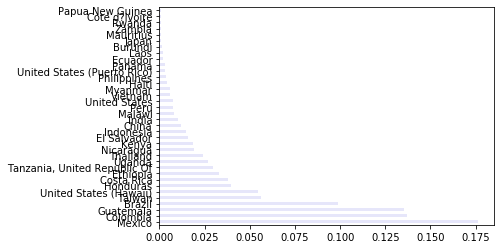

In [19]:
# Normalized Histogram of Country Value Counts
obj_df['country_of_origin'].value_counts(normalize=True).plot.barh(color='lavender')

Arabica    0.979089
Robusta    0.020911
Name: species, dtype: float64


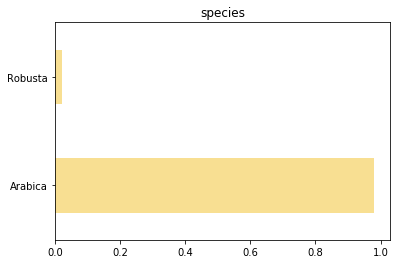

juan luis alvarado romero           0.116366
racafe & cia s.c.a                  0.045045
exportadora de cafe condor s.a      0.040541
kona pacific farmers cooperative    0.039039
ipanema coffees                     0.037538
                                      ...   
ecom japan limited                  0.000751
katuka development trust ltd        0.000751
eugene holman pew                   0.000751
fernando mendoza aparicio           0.000751
leonides de la cruz lopez           0.000751
Name: owner, Length: 315, dtype: float64


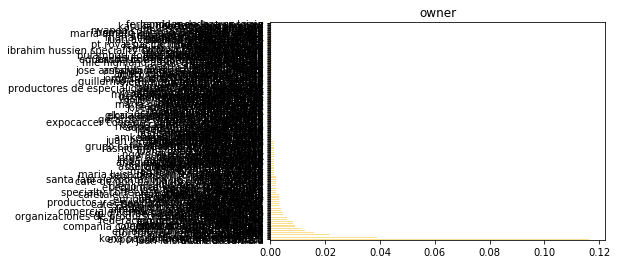

Mexico                          0.176383
Colombia                        0.136771
Guatemala                       0.135277
Brazil                          0.098655
Taiwan                          0.056054
United States (Hawaii)          0.054559
Honduras                        0.039611
Costa Rica                      0.038117
Ethiopia                        0.032885
Tanzania, United Republic Of    0.029895
Uganda                          0.026906
Thailand                        0.023916
Nicaragua                       0.019432
Kenya                           0.018685
El Salvador                     0.015695
Indonesia                       0.014948
China                           0.011958
India                           0.010463
Malawi                          0.008221
Peru                            0.007474
United States                   0.007474
Vietnam                         0.005979
Myanmar                         0.005979
Haiti                           0.004484
Philippines     

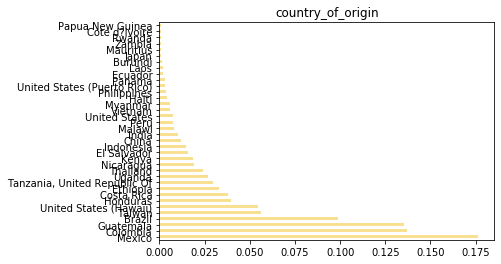

unex guatemala, s.a.                0.076106
ipanema coffees                     0.044248
kona pacific farmers cooperative    0.035398
racafe & cia s.c.a                  0.035398
exportadora de cafe condor s.a      0.035398
                                      ...   
terra mia                           0.000885
haider abamecha coffee export       0.000885
cafe shunuc                         0.000885
kongoni estate                      0.000885
carrillo cooperativa                0.000885
Name: company, Length: 281, dtype: float64


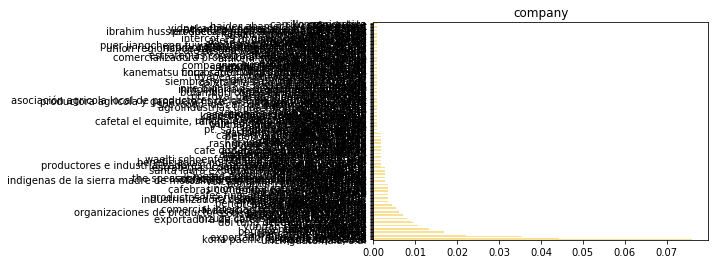

huila                                                                   0.087500
oriente                                                                 0.062500
south of minas                                                          0.053125
kona                                                                    0.051562
veracruz                                                                0.027344
                                                                          ...   
chapulhuacan, hidalgo                                                   0.000781
tepetzingo                                                              0.000781
south western                                                           0.000781
nanxi dist., tainan city 臺南市楠西區                                         0.000781
department of ahuachapan, municipality of apanecallamatepec mountain    0.000781
Name: region, Length: 356, dtype: float64


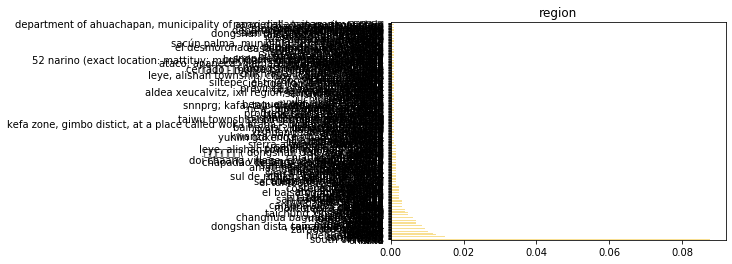

La Plata                        0.027100
Ipanema Agrícola SA             0.019874
Doi Tung Development Project    0.015357
VARIOS                          0.010840
Ipanema Agricola                0.010840
                                  ...   
ETMAR DIDIER ROBLERO LOPEZ      0.000903
Carmem Lucia Chaves de Brito    0.000903
Chesiyo Farmer group            0.000903
Plinio Ruiz                     0.000903
Fang zheng lun 方政倫              0.000903
Name: producer, Length: 690, dtype: float64


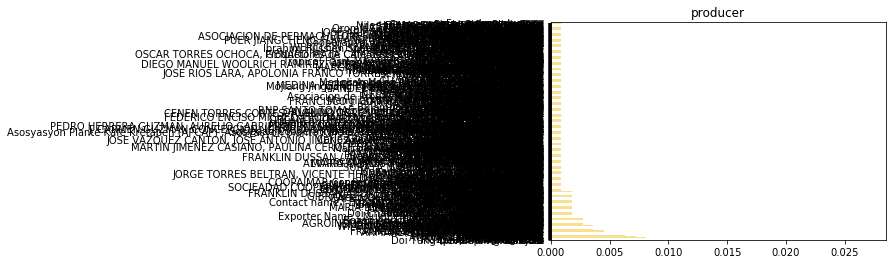

Green           0.776093
Bluish-Green    0.101695
Blue-Green      0.075825
None            0.046387
Name: color, dtype: float64


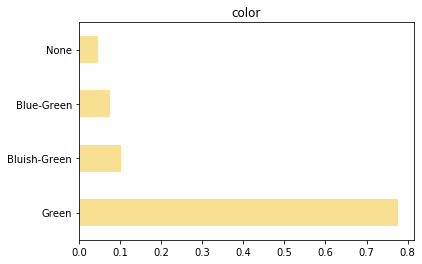

In [23]:
# Examine distributions of all Categorical data
for col in obj_df:
    p = obj_df[col].value_counts(normalize=True)
    print(p)

    #plot bar graph
    obj_df[col].value_counts(normalize=True).plot.barh(color='#F8DF92')
    plt.title(col)
    plt.show()

The above code will show you the value_counts for each categorical column and then plot a normalized graph showcasing the proportion of the whole dataset that belongs to each unique value in that column

Depending on dataset this can get very cluttered, so potentially subset or call function on specific columns of interest!

## Preliminary Visualizations in Pandas

Pandas provides quite good visualization out of the box and the below code is how you can manipulate some of the elements.
You can reference the original doc here- https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

<BR>

Viz Tips:
- the 'color' param is useful for single color items like a hist or scatter, param 'colormap' is useful for things that may have a diverging palette or a spectrum you wish to map color onto
- Kinds of Supported Graphs:
    - line : line plot (default)
    - bar : vertical bar plot
    - barh : horizontal bar plot
    - hist : histogram
    - box : boxplot
    - kde : Kernel Density Estimation plot
    - density : same as ‘kde’
    - area : area plot
    - pie : pie plot
    - scatter : scatter plot
    - hexbin : hexbin plot

In [ ]:
# Full Function

df.plot(x=None # x-axis variable -- will always need
      , y=None # y-axis variable -- not always required (histogram)
      , kind='line' # supports many types of graphs -- see above for full list
      , ax=None # similar to matplotlib lets you specify axis attributes (fonts, titles, etc.)
      , subplots=False # create subplots per column
      , sharex=None # if subplots, x-axis is uniform across plots
      , sharey=False # if subplots, y-axis is uniform
      , layout=None # if subplots -- tuple-like specification (rows, columns), for layout of subplots
      , figsize=None # tuple (width, height), in inches
      , use_index=True # if true, sets index as ticks on x-axis
      , title=None # string or list, will be title of plot
      , grid=None # True or False, will add grid lines to axes
      , legend=True # add legend on axis subplots
      , style=None # matplotlib style for each column
      , logx=False # log scaling of only x-axis
      , logy=False # log scaling of only y-axis
      , loglog=False # log scaling of both axes
      , xticks=None #sequence of numbers, for labeling specific ticks on x-axis
      , yticks=None #sequence of numbers, for labeling specific ticks on y-axis
      , xlim=None # 2 item (tuple/list) for limits of x-axis (lower, upper)
      , ylim=None # 2 item (tuple/list) for limits of y-axis (lower, upper)
      , rot=None # int, rotation for ticks applied
      , fontsize=None # int, changes fontsize for all ticks
      , colormap=None # str or matplotlib colormap object, specify a color like html code or one of the cmap types from matplotlib
      , sort_columns=False # if true will sort x-axis columns by name
        )

### Plot Examples

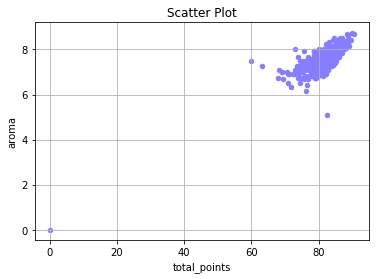

In [16]:
df.plot(x='total_points'
      , y='aroma'
      , kind='scatter'
      , title='Scatter Plot'
      , color='#867EFF'
      , grid=True
)

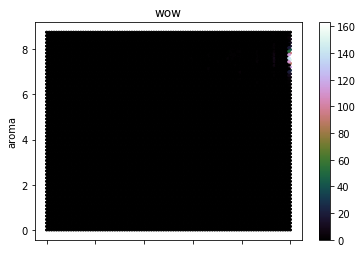

In [14]:
df.plot(x='sweetness'
        , y='aroma'
        , kind='hexbin'
        , colormap='cubehelix'
        )